In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd;
import seaborn as sb;
import numpy as np;
#loaded dataset
dataset_climate=pd.read_excel("climated_data.xlsx"); #return DataFrame

#Column 1: Latin hypercube study ID (study 1 to study 3) - generowanie prawie losowej probki wartosci pa z rozkladu wielowymiarowego
#Column 2: simulation ID (run 1 to run 180) 
#kolumny 1 i 2 nie bierzemy do badan
#Columns 3-20: values of 18 climate model parameters scaled in the interval [0, 1] 

In [4]:
X = dataset_climate.iloc[:, 2:20] #cut specified rows, needed to algo, data rows without result
result=dataset_climate.iloc[:,20]
print(X)
#Y=dataset_climate.outcome.values; #labels
#print(X.head())

     vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  vconst_6  vconst_7  \
0       0.859036  0.927825  0.252866  0.298838  0.170521  0.735936  0.428325   
1       0.606041  0.457728  0.359448  0.306957  0.843331  0.934851  0.444572   
2       0.997600  0.373238  0.517399  0.504993  0.618903  0.605571  0.746225   
3       0.783408  0.104055  0.197533  0.421837  0.742056  0.490828  0.005525   
4       0.406250  0.513199  0.061812  0.635837  0.844798  0.441502  0.191926   
..           ...       ...       ...       ...       ...       ...       ...   
535     0.657136  0.489375  0.133713  0.411950  0.087780  0.356289  0.480204   
536     0.915894  0.842720  0.518947  0.090622  0.336981  0.893576  0.978703   
537     0.478600  0.941185  0.769245  0.950776  0.189406  0.112743  0.745645   
538     0.007793  0.779287  0.867468  0.704820  0.983282  0.420303  0.710612   
539     0.608075  0.031556  0.598264  0.794771  0.145680  0.378183  0.461948   

      ah_corr  ah_bolus  slm_corr  effi

In [5]:
#print(X);

print(dataset_climate.isnull().sum()); #check if values are correct return, True if incorrect

Study                   0
Run                     0
vconst_corr             0
vconst_2                0
vconst_3                0
vconst_4                0
vconst_5                0
vconst_6                0
vconst_7                0
ah_corr                 0
ah_bolus                0
slm_corr                0
efficiency_factor       0
tidal_mix_max           0
vertical_decay_scale    0
convect_corr            0
bckgrnd_vdc1            0
bckgrnd_vdc_ban         0
bckgrnd_vdc_eq          0
bckgrnd_vdc_psim        0
outcome                 0
dtype: int64


1    494
0     46
Name: outcome, dtype: int64
positive
negative


/home/janek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='outcome', ylabel='count'>

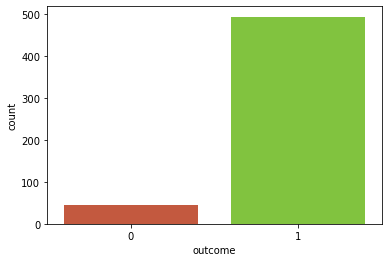

In [9]:
print(dataset_climate['outcome'].value_counts()) #wynik
positive=dataset_climate['outcome'].value_counts()[1];
negative=dataset_climate['outcome'].value_counts()[0];
print('positive'.format(positive,len(dataset_climate), round(positive/len(dataset_climate) * 100,2), ''))
print('negative'.format(negative,len(dataset_climate), round(negative/len(dataset_climate) * 100,2),''))

colors = ["#d94c29", "#81d929"]
sb.countplot('outcome', data=dataset_climate,palette=colors)
#wykres wyników pozytywnych i negatywnych

In [13]:
#Analiza parametrów statystycznych pokazuje, że nasze zmienne są znormalizowane.
#Wszystkie te wartości mieszczą się w przedziale od 0 do 1. 
#Ponadto nie ma rzeczywistych różnic w rozkładzie wartości.

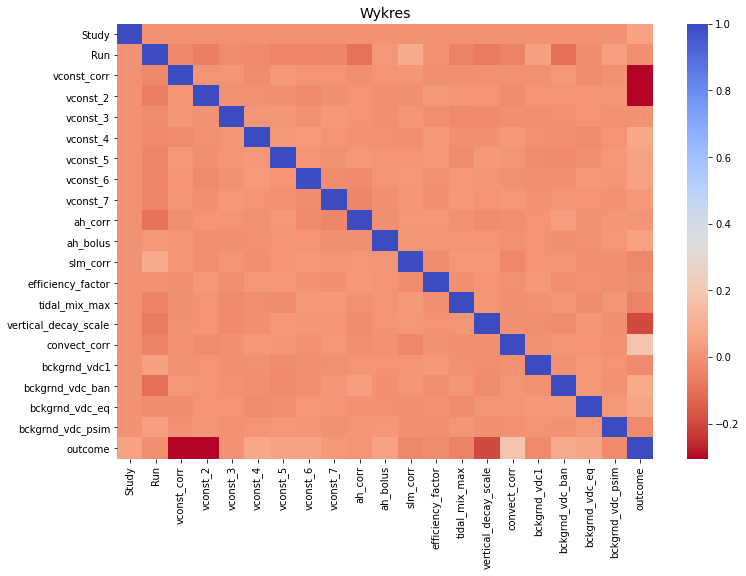

In [11]:
#korelacja na heatmapie
f, (ax1) = plt.subplots(1, 1, figsize=(12,8))

#corr=X.corr():
corr = dataset_climate.corr()
sb.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Wykres", fontsize=14)

plt.show()

Wniosek: na powyższym wykresie nie zauważamy wartosci odstających (szumu)
Nie można jednoznacznie stwierdzić od jakich cechy mają znaczący wpływ na klasyfikacje
Im niższe wartości zmiennych vconst_2, vconst_3, vertical scale, tym większa szansa powodzenia symulacji.
A im wyższe są te wartości,tym większa szansa na niepowodzenie symulacji.

/home/janek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/janek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/janek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

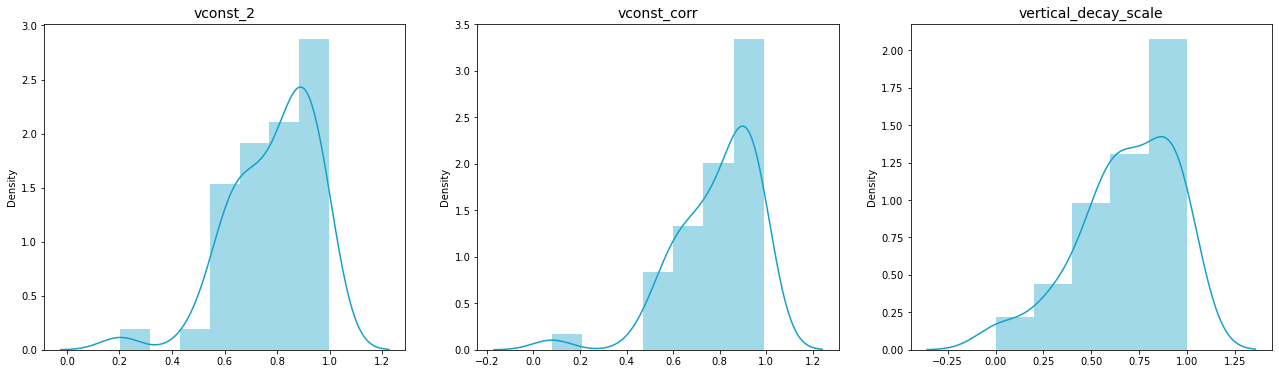

In [59]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(22, 6))

vconst_2 = dataset_climate['vconst_2'].loc[dataset_climate['outcome'] == 0].values
sb.distplot(vconst_2,ax=ax1, color='#16a0c9')
ax1.set_title('vconst_2', fontsize=14)

vconst_corr = dataset_climate['vconst_corr'].loc[dataset_climate['outcome'] == 0].values
sb.distplot(vconst_corr,ax=ax2, color='#16a0c9')
ax2.set_title('vconst_corr', fontsize=14)

vertical_decay_scale = dataset_climate['vertical_decay_scale'].loc[dataset_climate['outcome'] == 0].values
sb.distplot(vertical_decay_scale,ax=ax3, color='#16a0c9')
ax3.set_title('vertical_decay_scale', fontsize=14)


plt.show()

# Algorytmy które będą wykonywane na zbiorze: # 
   * Regresja logistyczna
   * Algorytm najblizszych sasiadow
   * Drzewo decyzyjne

In [16]:
X = dataset_climate.iloc[:, 2:20] #cut specified rows, needed to algo, data rows without result
y=dataset_climate.iloc[:,20]
#Y=dataset_climate.outcome.values; #labels

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Drzewo decyzyjne

In [39]:
from imblearn.over_sampling import SMOTE #klasa użyta do generowania liczb losowych
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, KFold 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
kf = KFold(n_splits=5,  shuffle=False)
#print(DecisionTreeClassifier.get_params().keys())

#utworzenie potoku z make_pipeline, przypisanie wyniku do zmiennej
result_pipeline = make_pipeline(StandardScaler(),
                              SMOTE(random_state=42),
                               DecisionTreeClassifier(random_state=42))

parametr = {'criterion': ['gini', 'entropy'],'max_depth': [1,2,3,4,5,6,7] , 'min_samples_split': [2, 3, 4]}
new_params = {'decisiontreeclassifier__' + key: params[key] for key in parametr}

grid_imba = GridSearchCV(result_pipeline, new_params, scoring='accuracy', cv=kf,
                        return_train_score=True)

grid_imba.fit(X_train, y_train)
print('Dokladnosc: {:.4} z parametrami: {}'.format(grid_imba.best_score_, grid_imba.best_params_))

  

Dokladnosc: 0.889 z parametrami: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 2}


In [41]:
predictions = grid_imba.predict(X_test)
score = grid_imba.score(X_test, y_test)
print('Dokladnosc na zbiorze testowym: ')
print(score)

Dokladnosc na zbiorze testowym: 
0.8888888888888888


Bez trenowania: ROC AUC=0.500
Po wytrenowaniu: ROC AUC=0.887


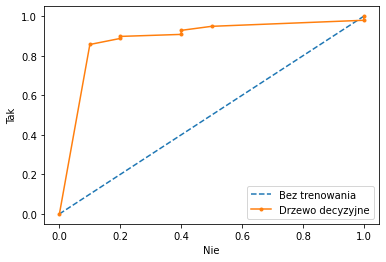

In [47]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# prognoza dla braku umiejetnosci
minus_train = [0 for _ in range(len(y_test))]
# przewidywanie prawdopodobienstwa
plus_train = grid_imba.predict_proba(X_test)

# prawdobodobienstwo True wynikow
plus_train = plus_train[:, 1]

#obliczanie wynikow 
minusTrain_auc = roc_auc_score(y_test, minus_train)
plucTrain_auc = roc_auc_score(y_test, plus_train)

print('Bez trenowania: ROC AUC=%.3f' % (minusTrain_auc))
print('Po wytrenowaniu: ROC AUC=%.3f' % (plucTrain_auc))

false_rates, true_rates, _ = roc_curve(y_test, minus_train)
false_ratesTrain, true_ratesTrain, _ = roc_curve(y_test, plus_train)

pyplot.plot(false_rates, true_rates, linestyle='--', label='Bez trenowania')
pyplot.plot(false_ratesTrain, true_ratesTrain, marker='.', label='Drzewo decyzyjne')

pyplot.xlabel('Nie')
pyplot.ylabel('Tak')
pyplot.legend()
# show the plot
pyplot.show()
#ROC AUC=0.887



### Regresja Logistyczna

In [52]:
kf = KFold(n_splits=5, shuffle=False)

imba_pipeline = make_pipeline(StandardScaler(),
                              SMOTE(random_state=42),
                              LogisticRegression(solver='liblinear', random_state=0))

params = {'C':[0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,4,5,10,20,30,40,50,100]}

new_params = {'logisticregression__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, new_params, scoring='accuracy', cv=kf,
                        return_train_score=True)


grid_imba.fit(X_train, y_train)
#w zaleznosci od C wyznaczamy granice decyzyjna
print('Dokladnosc: {:.4}, z parametrem kompromicu C: {}'.format(grid_imba.best_score_, grid_imba.best_params_))

Dokladnosc: 0.9051, z parametrem kompromicu C: {'logisticregression__C': 30}


In [53]:
predictions = grid_imba.predict(X_test)
score = grid_imba.score(X_test, y_test)
print('Dokladnosc na zbiorze testowym: ')
print(score) 

Dokladnosc na zbiorze testowym: 
0.8703703703703703


Bez trenowania: ROC AUC=0.500
Po wytrenowaniu: ROC AUC=0.961


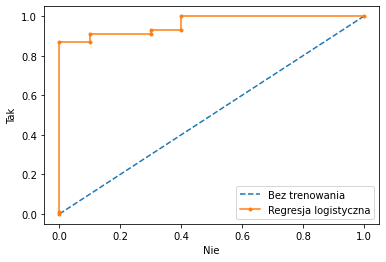

In [51]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# prognoza dla braku umiejetnosci
minus_train = [0 for _ in range(len(y_test))]
# przewidywanie prawdopodobienstwa
plus_train = grid_imba.predict_proba(X_test)

# prawdobodobienstwo True wynikow
plus_train = plus_train[:, 1]

#obliczanie wynikow 
minusTrain_auc = roc_auc_score(y_test, minus_train)
plusTrain_auc = roc_auc_score(y_test, plus_train)

print('Bez trenowania: ROC AUC=%.3f' % (minusTrain_auc))
print('Po wytrenowaniu: ROC AUC=%.3f' % (plusTrain_auc))

false_rates, true_rates, _ = roc_curve(y_test, minus_train)
false_ratesTrain, true_ratesTrain, _ = roc_curve(y_test, plus_train)

pyplot.plot(false_rates, true_rates, linestyle='--', label='Bez trenowania')
pyplot.plot(false_ratesTrain, true_ratesTrain, marker='.', label='Regresja logistyczna')

pyplot.xlabel('Nie')
pyplot.ylabel('Tak')
pyplot.legend()
# show the plot
pyplot.show()
#ROC AUC=0.961


### Najblizszych sasiadow

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, KFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline, make_pipeline

In [55]:
kf = KFold(n_splits=5,  shuffle=False) 

imba_pipeline = make_pipeline(StandardScaler(),
                              SMOTE(random_state=42),
                              KNeighborsClassifier())

params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}

new_params = {'kneighborsclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, new_params, scoring='accuracy', cv=kf,
                        return_train_score=True)

grid_imba.fit(X_train, y_train)
print('Dokladnosc: {:.4}, z K: {}'.format(grid_imba.best_score_, grid_imba.best_params_))

Dokladnosc: 0.8403, z K: {'kneighborsclassifier__n_neighbors': 1}


In [56]:
predictions = grid_imba.predict(X_test)
score = grid_imba.score(X_test, y_test)
print('Dokladnosc na zbiorze testowym: ')
print(score)

Dokladnosc na zbiorze testowym: 
0.7870370370370371


Bez trenowania: ROC AUC=0.500
Po wytrenowaniu: ROC AUC=0.568


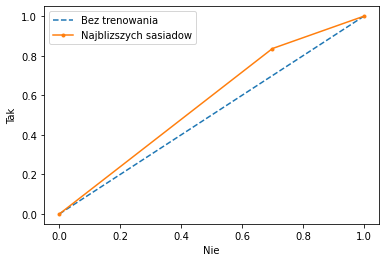

In [59]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# prognoza dla braku umiejetnosci
minus_train = [0 for _ in range(len(y_test))]
# przewidywanie prawdopodobienstwa
plus_train = grid_imba.predict_proba(X_test)

# prawdobodobienstwo True wynikow
plus_train = plus_train[:, 1]

#obliczanie wynikow 
minusTrain_auc = roc_auc_score(y_test, minus_train)
plusTrain_auc = roc_auc_score(y_test, plus_train)

print('Bez trenowania: ROC AUC=%.3f' % (minusTrain_auc))
print('Po wytrenowaniu: ROC AUC=%.3f' % (plusTrain_auc))

false_rates, true_rates, _ = roc_curve(y_test, minus_train)
false_ratesTrain, true_ratesTrain, _ = roc_curve(y_test, plus_train)

pyplot.plot(false_rates, true_rates, linestyle='--', label='Bez trenowania')
pyplot.plot(false_ratesTrain, true_ratesTrain, marker='.', label='Najblizszych sasiadow')

pyplot.xlabel('Nie')
pyplot.ylabel('Tak')
pyplot.legend()
# show the plot
pyplot.show()
#ROC AUC=0.961